In [47]:
import numpy as np
import pandas as pd
import requests 
import matplotlib.pyplot as plt 
import seaborn as sns


In [48]:
df = pd.read_csv(r'C:\Users\smo2020\Downloads\NotebookFile&Data-20240415T052415Z-001\Notebook File & Data\train_indessa.csv')
df

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,batch_enrolled,int_rate,grade,sub_grade,emp_title,...,collections_12_mths_ex_med,mths_since_last_major_derog,application_type,verification_status_joint,last_week_pay,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,loan_status
0,58189336,14350,14350,14350.0,36 months,,19.19,E,E3,clerk,...,0.0,74.0,INDIVIDUAL,NaN,26th week,0.0,0.0,28699.0,30800.0,0
1,70011223,4800,4800,4800.0,36 months,BAT1586599,10.99,B,B4,Human Resources Specialist,...,0.0,NaN,INDIVIDUAL,NaN,9th week,0.0,0.0,9974.0,32900.0,0
2,70255675,10000,10000,10000.0,36 months,BAT1586599,7.26,A,A4,Driver,...,0.0,NaN,INDIVIDUAL,NaN,9th week,0.0,65.0,38295.0,34900.0,0
3,1893936,15000,15000,15000.0,36 months,BAT4808022,19.72,D,D5,Us office of Personnel Management,...,0.0,NaN,INDIVIDUAL,NaN,135th week,0.0,0.0,55564.0,24700.0,0
4,7652106,16000,16000,16000.0,36 months,BAT2833642,10.64,B,B2,LAUSD-HOLLYWOOD HIGH SCHOOL,...,0.0,NaN,INDIVIDUAL,NaN,96th week,0.0,0.0,47159.0,47033.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
532423,31296187,20000,20000,20000.0,36 months,,12.49,B,B5,Registered Nurse,...,0.0,NaN,INDIVIDUAL,NaN,65th week,0.0,0.0,83087.0,24800.0,0
532424,29403184,12000,12000,12000.0,60 months,BAT2003848,14.99,C,C5,Account Mgr,...,0.0,NaN,INDIVIDUAL,NaN,70th week,0.0,0.0,227812.0,17800.0,0
532425,7357607,18725,18725,18725.0,60 months,NaN,20.80,E,E1,Comcast cable,...,0.0,NaN,INDIVIDUAL,NaN,9th week,0.0,0.0,26010.0,24200.0,1
532426,23182668,21000,21000,21000.0,60 months,BAT3193689,16.29,D,D2,Resident Physician,...,0.0,NaN,INDIVIDUAL,NaN,78th week,0.0,0.0,29197.0,23300.0,0


In [49]:
df.shape # gives you the number of rows and columns 

(532428, 45)

In [50]:
df.info() # tells null or not and what the data type is. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 532428 entries, 0 to 532427
Data columns (total 45 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   member_id                    532428 non-null  int64  
 1   loan_amnt                    532428 non-null  int64  
 2   funded_amnt                  532428 non-null  int64  
 3   funded_amnt_inv              532428 non-null  float64
 4   term                         532428 non-null  object 
 5   batch_enrolled               447279 non-null  object 
 6   int_rate                     532428 non-null  float64
 7   grade                        532428 non-null  object 
 8   sub_grade                    532428 non-null  object 
 9   emp_title                    501595 non-null  object 
 10  emp_length                   505537 non-null  object 
 11  home_ownership               532428 non-null  object 
 12  annual_inc                   532425 non-null  float64
 13 

In [51]:
df.head(7) # less you put a number it will be top 5

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,batch_enrolled,int_rate,grade,sub_grade,emp_title,...,collections_12_mths_ex_med,mths_since_last_major_derog,application_type,verification_status_joint,last_week_pay,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,loan_status
0,58189336,14350,14350,14350.0,36 months,,19.19,E,E3,clerk,...,0.0,74.0,INDIVIDUAL,NaN,26th week,0.0,0.0,28699.0,30800.0,0
1,70011223,4800,4800,4800.0,36 months,BAT1586599,10.99,B,B4,Human Resources Specialist,...,0.0,NaN,INDIVIDUAL,NaN,9th week,0.0,0.0,9974.0,32900.0,0
2,70255675,10000,10000,10000.0,36 months,BAT1586599,7.26,A,A4,Driver,...,0.0,NaN,INDIVIDUAL,NaN,9th week,0.0,65.0,38295.0,34900.0,0
3,1893936,15000,15000,15000.0,36 months,BAT4808022,19.72,D,D5,Us office of Personnel Management,...,0.0,NaN,INDIVIDUAL,NaN,135th week,0.0,0.0,55564.0,24700.0,0
4,7652106,16000,16000,16000.0,36 months,BAT2833642,10.64,B,B2,LAUSD-HOLLYWOOD HIGH SCHOOL,...,0.0,NaN,INDIVIDUAL,NaN,96th week,0.0,0.0,47159.0,47033.0,0
5,10247268,15000,15000,14950.0,36 months,BAT2575549,8.90,A,A5,Design Consultant,...,0.0,NaN,INDIVIDUAL,NaN,113th week,0.0,0.0,350619.0,29500.0,0
6,8089625,5000,5000,4975.0,36 months,,7.90,A,A4,TOYOTA OF NORTH HOLLYWOOD,...,0.0,NaN,INDIVIDUAL,NaN,117th week,0.0,1023.0,13272.0,55500.0,1


In [52]:
df.tail(10)

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,batch_enrolled,int_rate,grade,sub_grade,emp_title,...,collections_12_mths_ex_med,mths_since_last_major_derog,application_type,verification_status_joint,last_week_pay,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,loan_status
532418,71054913,10000,10000,10000.0,36 months,NaN,9.76,B,B3,Teacher,...,0.0,NaN,INDIVIDUAL,NaN,4th week,0.0,890.0,121294.0,19700.0,0
532419,51774468,4800,4800,4800.0,36 months,BAT1184694,11.53,B,B5,Help Desk Technician,...,0.0,NaN,INDIVIDUAL,NaN,31th week,0.0,0.0,24985.0,10400.0,0
532420,16661491,5700,5700,5700.0,36 months,BAT5489674,14.16,C,C2,Admin Secretary,...,0.0,NaN,INDIVIDUAL,NaN,4th week,0.0,0.0,89997.0,15600.0,1
532421,32097538,13000,13000,13000.0,60 months,BAT2078974,12.99,C,C1,Teacher,...,0.0,7.0,INDIVIDUAL,NaN,65th week,0.0,0.0,11231.0,26900.0,0
532422,8219842,10000,10000,10000.0,36 months,NaN,14.33,C,C2,Champion Mortgage,...,0.0,NaN,INDIVIDUAL,NaN,22th week,0.0,0.0,189233.0,24200.0,1
532423,31296187,20000,20000,20000.0,36 months,,12.49,B,B5,Registered Nurse,...,0.0,NaN,INDIVIDUAL,NaN,65th week,0.0,0.0,83087.0,24800.0,0
532424,29403184,12000,12000,12000.0,60 months,BAT2003848,14.99,C,C5,Account Mgr,...,0.0,NaN,INDIVIDUAL,NaN,70th week,0.0,0.0,227812.0,17800.0,0
532425,7357607,18725,18725,18725.0,60 months,NaN,20.80,E,E1,Comcast cable,...,0.0,NaN,INDIVIDUAL,NaN,9th week,0.0,0.0,26010.0,24200.0,1
532426,23182668,21000,21000,21000.0,60 months,BAT3193689,16.29,D,D2,Resident Physician,...,0.0,NaN,INDIVIDUAL,NaN,78th week,0.0,0.0,29197.0,23300.0,0
532427,46122259,10000,10000,10000.0,36 months,BAT4136152,6.39,A,A2,Health Care Analyst,...,0.0,NaN,INDIVIDUAL,NaN,44th week,0.0,0.0,47866.0,21700.0,0


In [53]:
# check for null values with count- count and percent of null. sorting them desc
null_cols = df.columns[df.isnull().any()]

null_df = df[null_cols].isnull().sum().to_frame(name='Null Count')\
                    .merge(df[null_cols].isnull().mean().mul(100).to_frame(name='Null Percent'), left_index=True, right_index=True)

null_df_sorted = null_df.sort_values(by='Null Count', ascending=False)

print(null_df_sorted)


                             Null Count  Null Percent
verification_status_joint        532123     99.942715
desc                             456829     85.801085
mths_since_last_record           450305     84.575755
mths_since_last_major_derog      399448     75.023853
mths_since_last_delinq           272554     51.190771
batch_enrolled                    85149     15.992585
tot_cur_bal                       42004      7.889142
tot_coll_amt                      42004      7.889142
total_rev_hi_lim                  42004      7.889142
emp_title                         30833      5.791018
emp_length                        26891      5.050636
revol_util                          287      0.053904
collections_12_mths_ex_med           95      0.017843
title                                91      0.017092
inq_last_6mths                       16      0.003005
pub_rec                              16      0.003005
total_acc                            16      0.003005
delinq_2yrs                 

In [54]:
df.isnull().sum()

member_id                           0
loan_amnt                           0
funded_amnt                         0
funded_amnt_inv                     0
term                                0
batch_enrolled                  85149
int_rate                            0
grade                               0
sub_grade                           0
emp_title                       30833
emp_length                      26891
home_ownership                      0
annual_inc                          3
verification_status                 0
pymnt_plan                          0
desc                           456829
purpose                             0
title                              91
zip_code                            0
addr_state                          0
dti                                 0
delinq_2yrs                        16
inq_last_6mths                     16
mths_since_last_delinq         272554
mths_since_last_record         450305
open_acc                           16
pub_rec     

In [55]:
df.isnull().mean().mul(100)

member_id                       0.000000
loan_amnt                       0.000000
funded_amnt                     0.000000
funded_amnt_inv                 0.000000
term                            0.000000
batch_enrolled                 15.992585
int_rate                        0.000000
grade                           0.000000
sub_grade                       0.000000
emp_title                       5.791018
emp_length                      5.050636
home_ownership                  0.000000
annual_inc                      0.000563
verification_status             0.000000
pymnt_plan                      0.000000
desc                           85.801085
purpose                         0.000000
title                           0.017092
zip_code                        0.000000
addr_state                      0.000000
dti                             0.000000
delinq_2yrs                     0.003005
inq_last_6mths                  0.003005
mths_since_last_delinq         51.190771
mths_since_last_

In [56]:
# check for duplicates 
df[df.duplicated()].shape[0] # gives the number of duplicated entries 

0

In [57]:
# keeping and getting ride of features 
# the top colums have more than 50% nulls/ missing data- dropping these
df.drop(['verification_status_joint', 'desc', 'mths_since_last_record', 'mths_since_last_major_derog', 'mths_since_last_delinq'], axis=1, inplace=True)


In [58]:
# picking the columns to focus on and renaming them
df_new = df[['funded_amnt_inv', 'term', 'int_rate', 'emp_title', 'annual_inc',
             'verification_status', 'purpose', 'addr_state', 'dti', 'initial_list_status',
             'total_rec_int', 'total_rec_late_fee', 'application_type', 'tot_coll_amt',
             'tot_cur_bal', 'loan_status','emp_length']].rename(columns={
    'funded_amnt_inv': 'Bank_Investment',
    'term': 'Loan_Term',
    'int_rate': 'Interest_Rate',
    'emp_title': 'Employer_Title',
    'annual_inc': 'Annual_Income',
    'verification_status': 'Status',
    'purpose': 'Loan_Purpose',
    'addr_state': 'State',
    'dti': 'Debt_To_Income',
    'initial_list_status': 'Initial_Listing_Status',
    'total_rec_int': 'Total_Interest_Received',
    'total_rec_late_fee': 'Total_Late_Fees_Received',
    'application_type': 'Application_Type',
    'tot_coll_amt': 'Total_Collection_Amount',
    'tot_cur_bal': 'Total_Current_Balance',
    'loan_status': 'Loan_Status',
    'emp_length' : 'Employment_Duration'
})



In [59]:
df_new.to_csv('EDA_Data.csv', index=False) # saving a csv to the folder in jupyter

In [60]:
df = pd.read_csv('EDA_Data.csv')

In [61]:
df.shape

(532428, 17)

In [77]:
df.info() # we went form over 30 columns to 16

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 532428 entries, 0 to 532427
Data columns (total 16 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Bank_Investment           532428 non-null  float64
 1   Loan_Term                 532428 non-null  int32  
 2   Interest_Rate             532428 non-null  float64
 3   Annual_Income             532425 non-null  float64
 4   Status                    532428 non-null  object 
 5   Loan_Purpose              532428 non-null  object 
 6   State                     532428 non-null  object 
 7   Debt_To_Income            532428 non-null  float64
 8   Initial_Listing_Status    532428 non-null  object 
 9   Total_Interest_Received   532428 non-null  float64
 10  Total_Late_Fees_Received  532428 non-null  float64
 11  Application_Type          532428 non-null  object 
 12  Total_Collection_Amount   490424 non-null  float64
 13  Total_Current_Balance     490424 non-null  f

In [78]:
df.head()

,Bank_Investment,Loan_Term,Interest_Rate,Annual_Income,Status,Loan_Purpose,State,Debt_To_Income,Initial_Listing_Status,Total_Interest_Received,Total_Late_Fees_Received,Application_Type,Total_Collection_Amount,Total_Current_Balance,Loan_Status,Employment_Duration
0,14350.0,36,19.19,28700.0,Source Verified,debt_consolidation,FL,33.88,f,1173.84,0.0,INDIVIDUAL,0.0,28699.0,0,9
1,4800.0,36,10.99,65000.0,Source Verified,home_improvement,MD,3.64,w,83.95,0.0,INDIVIDUAL,0.0,9974.0,0,< 1
2,10000.0,36,7.26,45000.0,Not Verified,debt_consolidation,OH,18.42,w,56.47,0.0,INDIVIDUAL,65.0,38295.0,0,2
3,15000.0,36,19.72,105000.0,Not Verified,debt_consolidation,VA,14.97,f,4858.62,0.0,INDIVIDUAL,0.0,55564.0,0,10
4,16000.0,36,10.64,52000.0,Verified,credit_card,CA,20.16,w,2296.41,0.0,INDIVIDUAL,0.0,47159.0,0,10


In [79]:
df.tail()

,Bank_Investment,Loan_Term,Interest_Rate,Annual_Income,Status,Loan_Purpose,State,Debt_To_Income,Initial_Listing_Status,Total_Interest_Received,Total_Late_Fees_Received,Application_Type,Total_Collection_Amount,Total_Current_Balance,Loan_Status,Employment_Duration
532423,20000.0,36,12.49,75000.0,Source Verified,debt_consolidation,MI,14.53,f,2595.45,0.0,INDIVIDUAL,0.0,83087.0,0,10
532424,12000.0,60,14.99,59000.0,Not Verified,debt_consolidation,MI,22.97,w,2182.92,0.0,INDIVIDUAL,0.0,227812.0,0,10
532425,18725.0,60,20.80,42504.0,Verified,debt_consolidation,TN,27.27,f,645.32,0.0,INDIVIDUAL,0.0,26010.0,1,8
532426,21000.0,60,16.29,50000.0,Source Verified,credit_card,OH,14.91,w,4619.79,0.0,INDIVIDUAL,0.0,29197.0,0,1
532427,10000.0,36,6.39,53000.0,Not Verified,debt_consolidation,CA,17.80,f,467.52,0.0,INDIVIDUAL,0.0,47866.0,0,< 1


In [80]:
# check for null values with count- count and percent of null. sorting them desc
null_cols = df.columns[df.isnull().any()]

null_df = df[null_cols].isnull().sum().to_frame(name='Null Count')\
                    .merge(df[null_cols].isnull().mean().mul(100).to_frame(name='Null Percent'), left_index=True, right_index=True)

null_df_sorted = null_df.sort_values(by='Null Count', ascending=False)

print(null_df_sorted)

                         Null Count  Null Percent
Total_Collection_Amount       42004      7.889142
Total_Current_Balance         42004      7.889142
Annual_Income                     3      0.000563


In [81]:
# the 5 columns above which have nulls can be taken care of by imputation.  mean, medium.   if a string we can only do mode 

In [82]:
df.rename(columns={'Employer_Title': 'Employee_Title'}, inplace=True)


In [85]:
distinct_entries = df['Employee_Title'].value_counts().sort_values(ascending=False)
# print sorted unique values 
print(distinct_entries)


KeyError: 'Employee_Title'

In [87]:
# Data Cleaning with tranfoming 
df['Employment_Duration'] = df['Employment_Duration'].str.replace('years','')
df['Employment_Duration'] = df['Employment_Duration'].str.replace('year','')
df['Employment_Duration'] = df['Employment_Duration'].str.replace('+','')
df['Employment_Duration'] = df['Employment_Duration'].str.replace('< 1','0')  # Corrected to remove the extra space
df['Employment_Duration'] = df['Employment_Duration'].str.strip()  # Remove leading/trailing whitespaces
df['Employment_Duration'] = df['Employment_Duration'].fillna('-1')
df['Employment_Duration'] = df['Employment_Duration'].astype(int)



In [89]:
# Separate numerical and categorical variables
column_category = df.select_dtypes(include=['object']).columns
print(column_category)


Index(['Status', 'Loan_Purpose', 'State', 'Initial_Listing_Status',
       'Application_Type'],
      dtype='object')


In [90]:
column_numerical = df.select_dtypes(include=np.number).columns.tolist()
print(column_numerical)

['Bank_Investment', 'Loan_Term', 'Interest_Rate', 'Annual_Income', 'Debt_To_Income', 'Total_Interest_Received', 'Total_Late_Fees_Received', 'Total_Collection_Amount', 'Total_Current_Balance', 'Loan_Status', 'Employment_Duration']


In [91]:
df.describe(include='all').T # get all non number and number columns

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Bank_Investment,532428.0,NaN,NaN,NaN,14704.926696,8441.290381,0.0,8000.0,13000.0,20000.0,35000.0
Loan_Term,532428.0,NaN,NaN,NaN,43.19579,10.996354,36.0,36.0,36.0,60.0,60.0
Interest_Rate,532428.0,NaN,NaN,NaN,13.242969,4.379611,5.32,9.99,12.99,16.2,28.99
Annual_Income,532425.0,NaN,NaN,NaN,75029.843289,65199.845014,1200.0,45000.0,65000.0,90000.0,9500000.0
Status,532428,3,Source Verified,197750,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Loan_Purpose,532428,14,debt_consolidation,314989,NaN,NaN,NaN,NaN,NaN,NaN,NaN
State,532428,51,CA,77911,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Debt_To_Income,532428.0,NaN,NaN,NaN,18.138767,8.369074,0.0,11.93,17.65,23.95,672.52
Initial_Listing_Status,532428,2,f,274018,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Total_Interest_Received,532428.0,NaN,NaN,NaN,1753.428788,2093.199837,0.0,441.6,1072.69,2234.735,24205.62


In [92]:
df.describe().T # gets all number columns

,count,mean,std,min,25%,50%,75%,max
Bank_Investment,532428.0,14704.926696,8441.290381,0.00,8000.00,13000.00,20000.000,35000.00
Loan_Term,532428.0,43.195790,10.996354,36.00,36.00,36.00,60.000,60.00
Interest_Rate,532428.0,13.242969,4.379611,5.32,9.99,12.99,16.200,28.99
Annual_Income,532425.0,75029.843289,65199.845014,1200.00,45000.00,65000.00,90000.000,9500000.00
Debt_To_Income,532428.0,18.138767,8.369074,0.00,11.93,17.65,23.950,672.52
Total_Interest_Received,532428.0,1753.428788,2093.199837,0.00,441.60,1072.69,2234.735,24205.62
Total_Late_Fees_Received,532428.0,0.394954,4.091546,0.00,0.00,0.00,0.000,358.68
Total_Collection_Amount,490424.0,213.562222,1958.571538,0.00,0.00,0.00,0.000,496651.00
Total_Current_Balance,490424.0,139554.110792,153914.877437,0.00,29839.75,80669.50,208479.250,8000078.00
Loan_Status,532428.0,0.236327,0.424826,0.00,0.00,0.00,0.000,1.00


## Insights

### Investment and Loan Terms:

The average investment amount is approximately $14,705, with most investments falling between $8,000 and $20,000.
Loan terms mostly span 36 to 60 months, with an average term of 43 months.

### Interest Rates:

The average interest rate is around 13.24%, with a range from 5.32% to 28.99%.
Most interest rates cluster around 9.99% to 16.2%.

### Financial Profiles:

Borrowers have diverse financial profiles. Annual incomes range from $1,200 to $9,500,000, with an average of $75,030.
Debt-to-income ratios vary widely, with an average of 18.14% and a maximum of 672.52%.

### Financial Outcomes:

Total interest received averages $1,753, with some loans generating as much as $24,205 in interest.
Late fees are generally low, with an average of $0.39 and a maximum of $358.68.

### Loan Performance:

The dataset suggests that about 23.63% of loans have been approved.
The employment duration for borrowers averages around 5.66 years, with a range from -1 to 10 years.


In [93]:
# imputation 
df[['Total_Collection_Amount','Total_Current_Balance','Annual_Income']].mean()

Total_Collection_Amount       213.562222
Total_Current_Balance      139554.110792
Annual_Income               75029.843289
dtype: float64

In [95]:
#replacing null values with minimum value since max is very high. too large of range to work with the mean 
df['Total_Collection_Amount'].fillna(df['Total_Collection_Amount'].min(), inplace=True)
df['Total_Current_Balance'].fillna(df['Total_Current_Balance'].min(), inplace=True)


In [ ]:
#I did a univariate analysis using Histogram and Box Plot for continuous variables like BANK_INVESTMENT and INTEREST_RATE

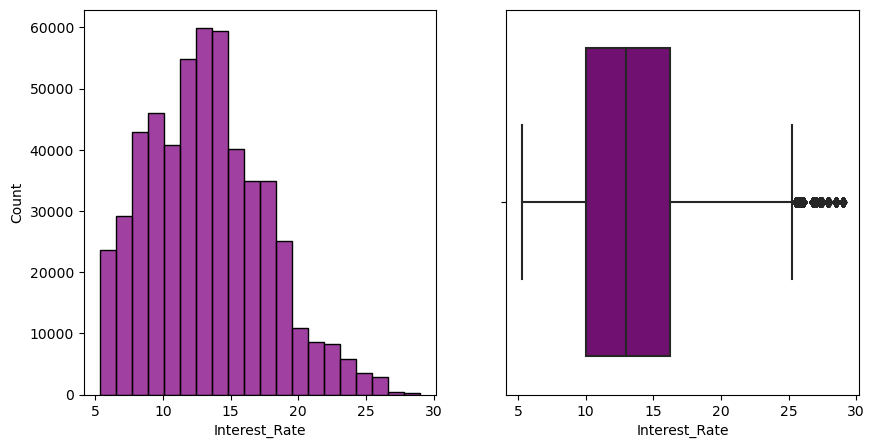

In [97]:
fig, axs = plt.subplots(ncols=2, figsize=(10,5))
sns.histplot(df, x="Interest_Rate", bins=20, color='purple',kde=False, ax=axs[0])
#axs[0].set_title('Histogram of BANK_INVESTMENT')
sns.boxplot(df, x="Interest_Rate",color='purple', ax=axs[1])
#axs[1].set_title('Boxplot of BANK_INVESTMENT')
plt.show()

In [ ]:
#These plots are right skewed and all outliers observed in fig 2 were dealt with during the imputation process.

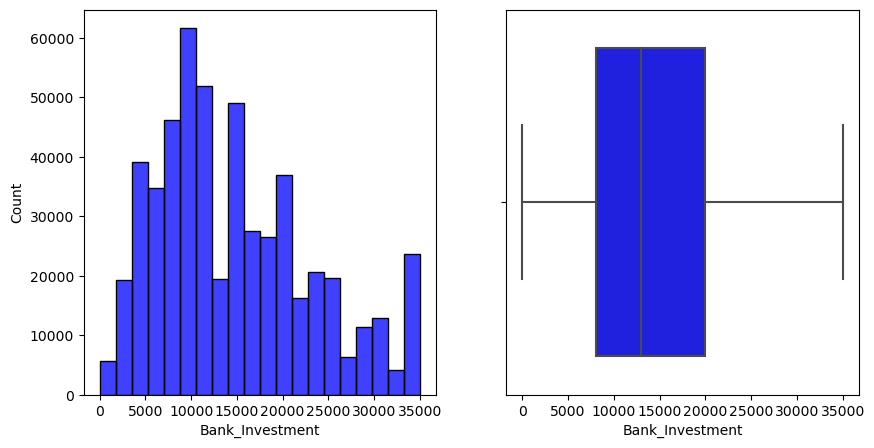

In [100]:
#These plots are right skewed and all outliers observed in fig 2 were dealt with during the imputation process.
fig, axs = plt.subplots(ncols=2, figsize=(10,5))
sns.histplot(df, x="Bank_Investment", bins=20, color='blue',kde=False, ax=axs[0])
#axs[0].set_title('Histogram of BANK_INVESTMENT')
sns.boxplot(df, x="Bank_Investment",color='blue', ax=axs[1])
#axs[1].set_title('Boxplot of BANK_INVESTMENT')
plt.show()

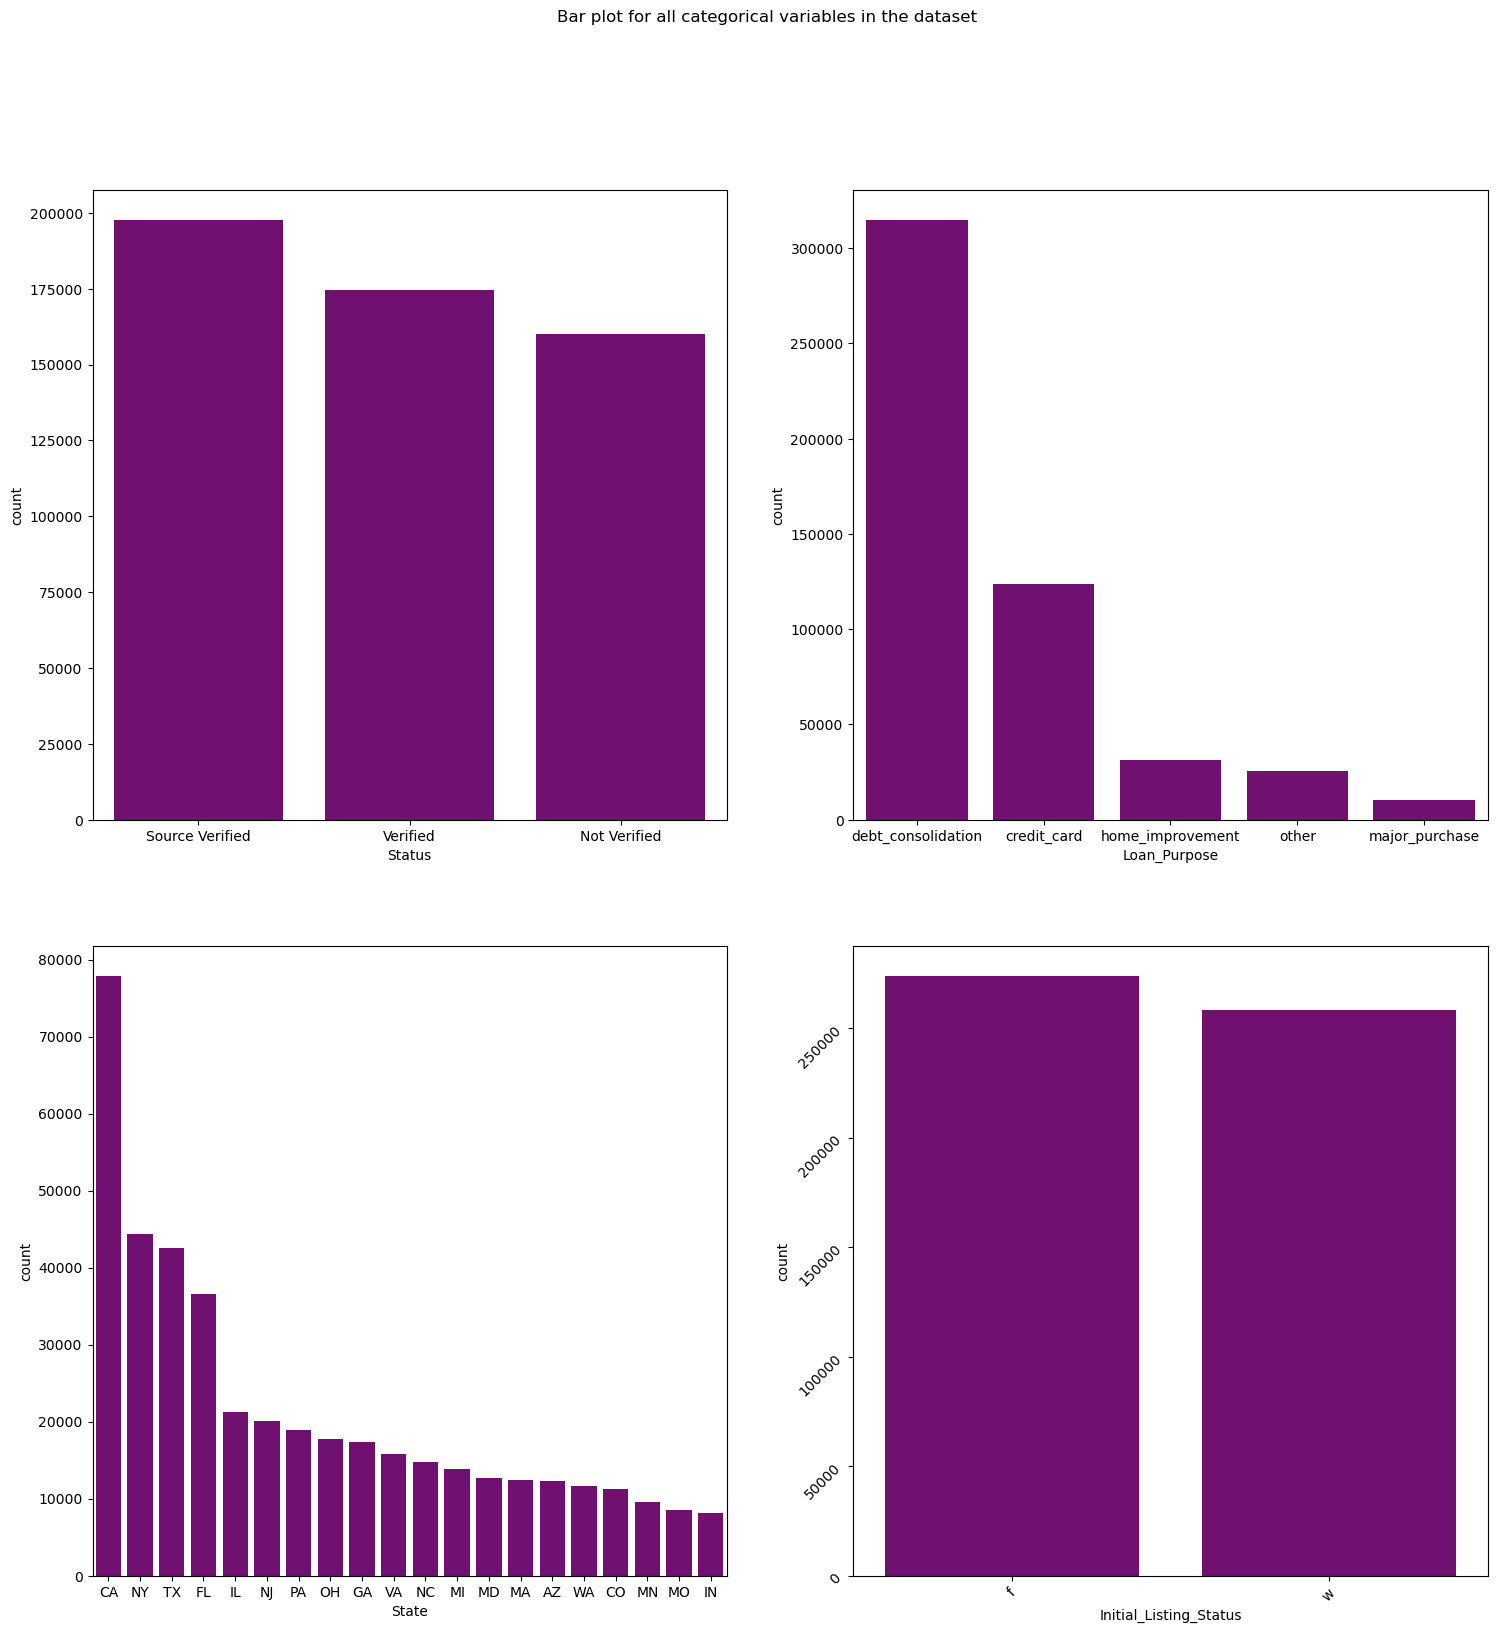

In [102]:
# Univariate analysis for categorical variables.

fig, axes = plt.subplots(2, 2, figsize = (18, 18))
fig.suptitle('Bar plot for all categorical variables in the dataset')
sns.countplot(ax = axes[0, 0], x = 'Status', data = df, color = 'purple', 
              order = df['Status'].value_counts().index);
sns.countplot(ax = axes[0, 1], x = 'Loan_Purpose', data = df, color = 'purple', 
              order = df['Loan_Purpose'].value_counts().index[:5]);
sns.countplot(ax = axes[1, 0], x = 'State', data = df, color = 'purple', 
              order = df['State'].value_counts().index[:20]);
sns.countplot(ax = axes[1, 1], x = 'Initial_Listing_Status', data = df, color = 'purple', 
              order = df['Initial_Listing_Status'].value_counts().index);
axes[1][1].tick_params(labelrotation=45);

### Observations
 
* Almost one-third of loan statuses were not verified. 

* Debt consolidation was the most popular purpose for loan lending.

* California had the highest number of loans issued in the US.

MemoryError: Unable to allocate 4.06 MiB for an array with shape (532428,) and data type int64

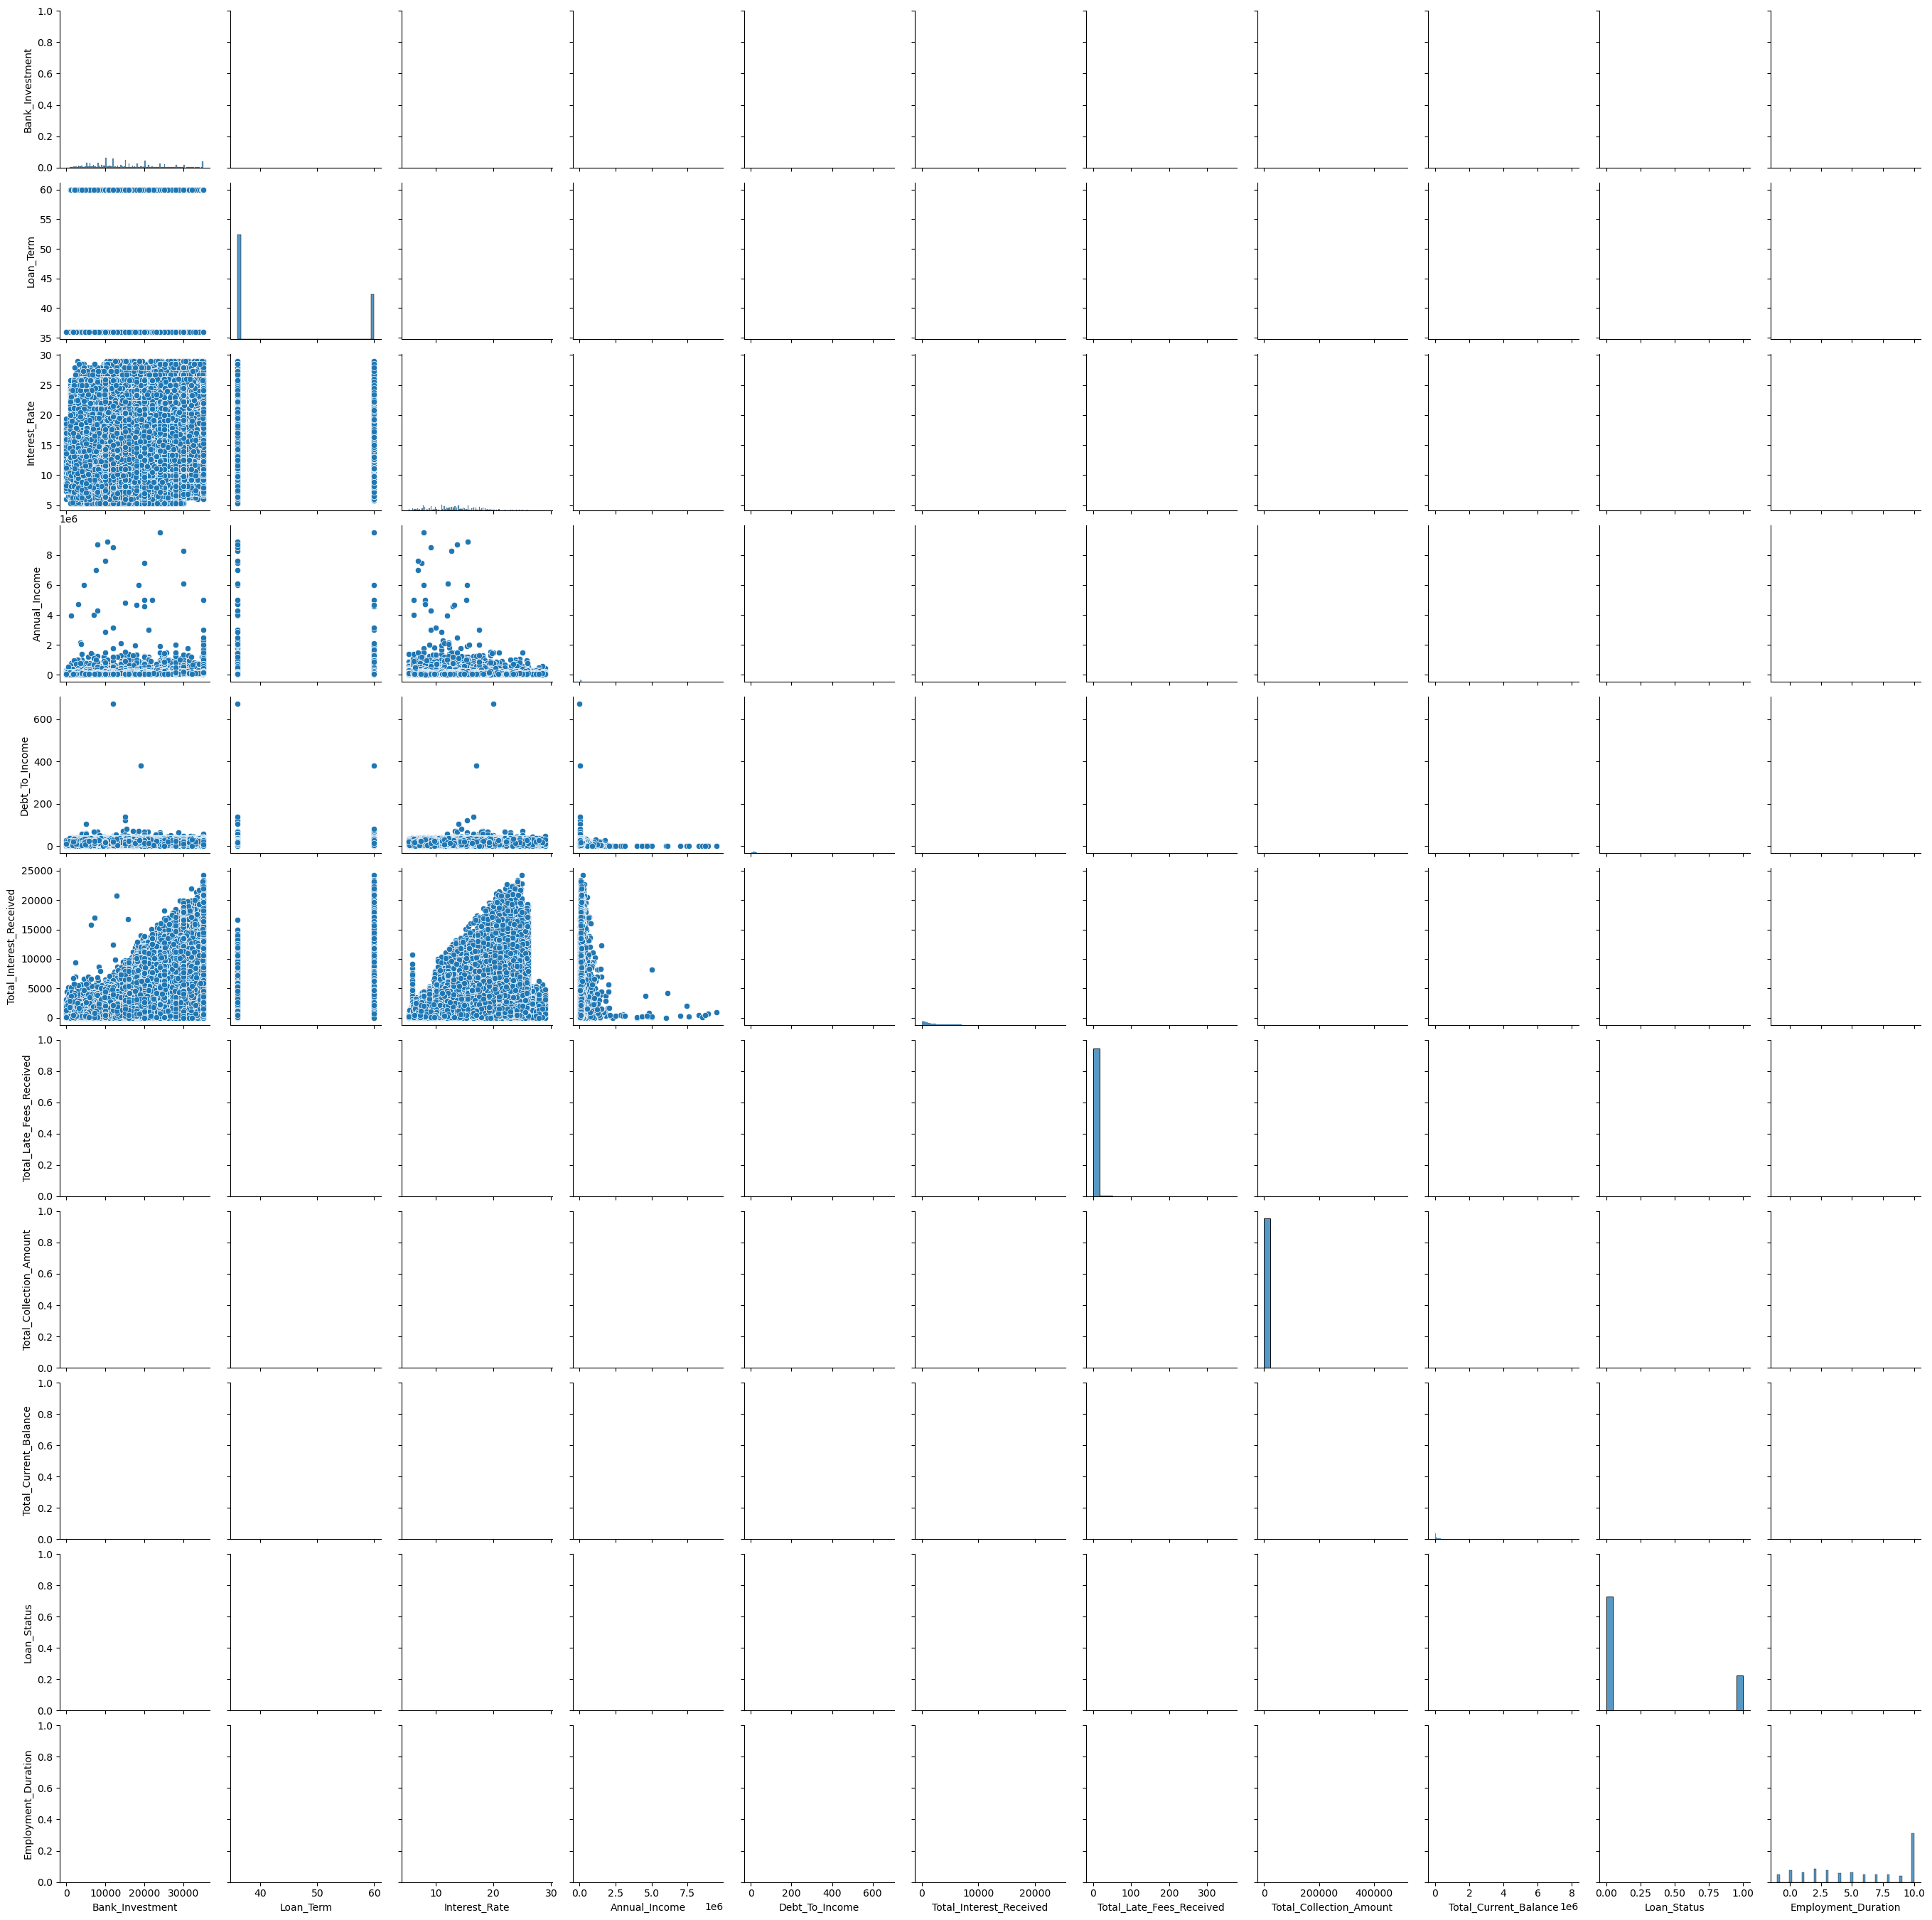

In [107]:
# bivariate anaylysis 
sns.pairplot(df[column_numerical])
plt.show()

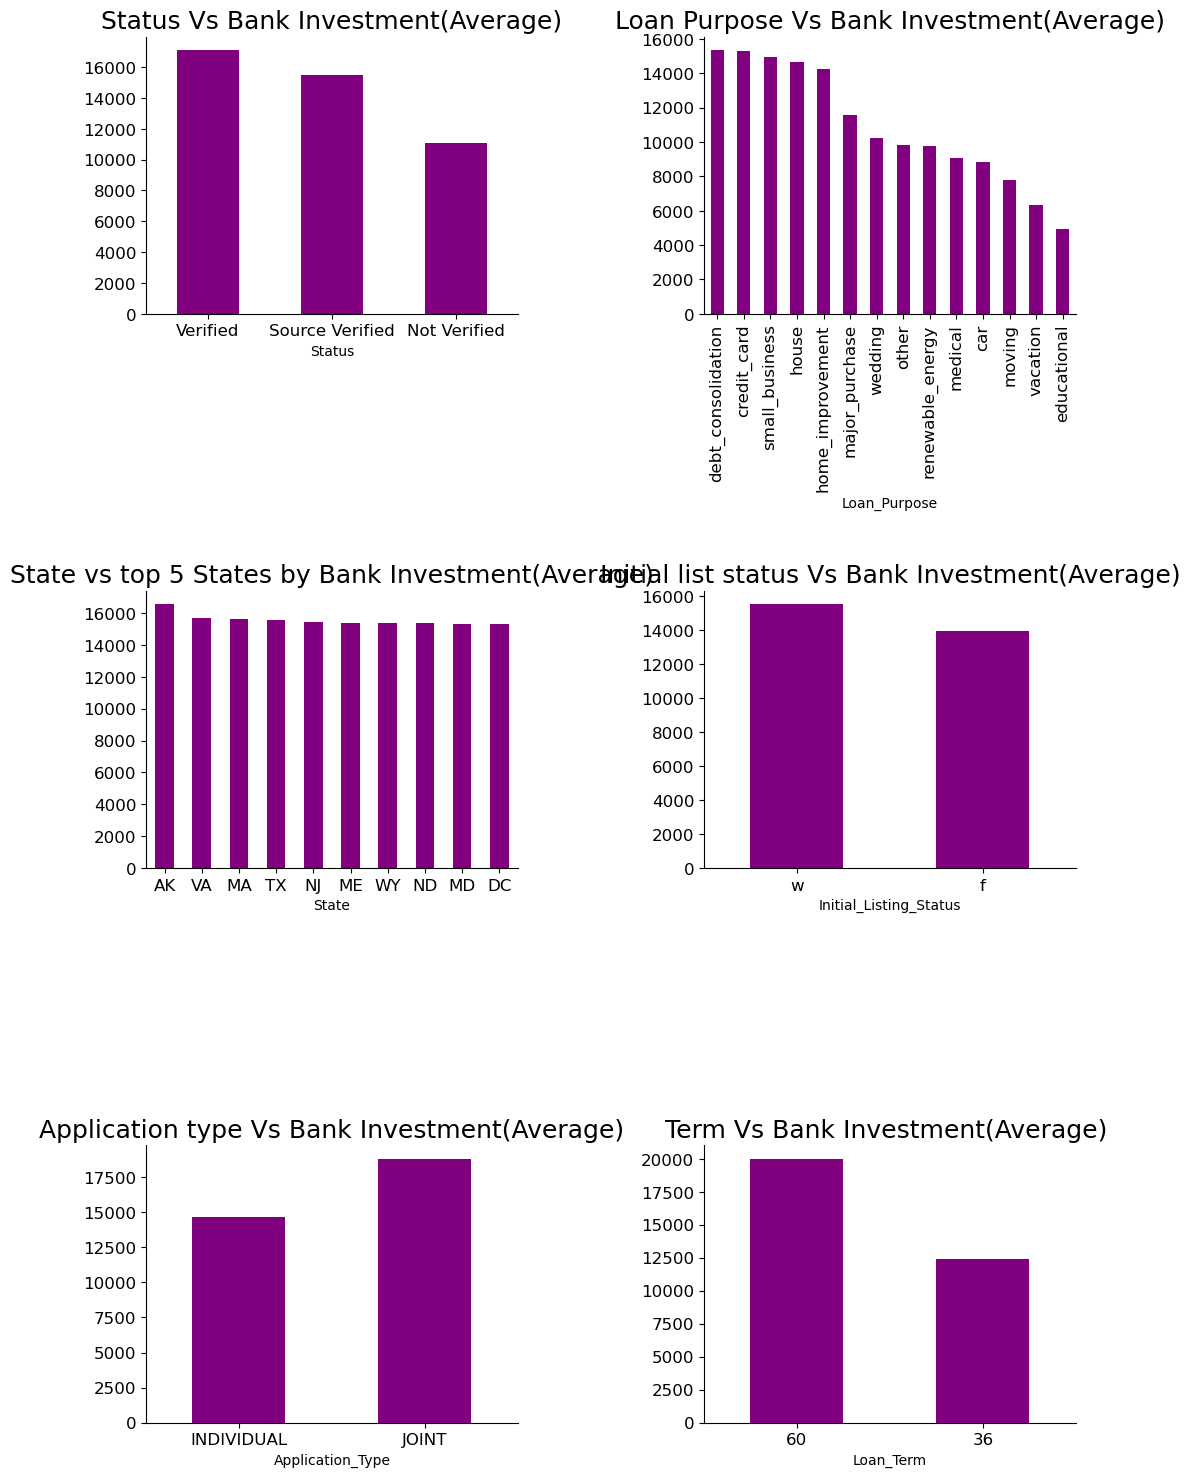

In [106]:
#  Bivariate analysis for numerical and categorical variables.
fig, axarr = plt.subplots(3, 2, figsize=(12, 18))
df.groupby('Status')['Bank_Investment'].mean().sort_values(ascending=False).plot.bar(ax=axarr[0][0], fontsize=12,color='purple')
axarr[0][0].set_title("Status Vs Bank Investment(Average)", fontsize=18)
axarr[0][0].set_xticklabels(axarr[0][0].get_xticklabels(), rotation=0)

df.groupby('Loan_Purpose')['Bank_Investment'].mean().sort_values(ascending=False).plot.bar(ax=axarr[0][1], fontsize=12,color='purple')
axarr[0][1].set_title("Loan Purpose Vs Bank Investment(Average)", fontsize=18)

df.groupby('State')['Bank_Investment'].mean().sort_values(ascending=False).head(10).plot.bar(ax=axarr[1][0], fontsize=12,color='purple')
axarr[1][0].set_title("State vs top 5 States by Bank Investment(Average)", fontsize=18)
axarr[1][0].set_xticklabels(axarr[1][0].get_xticklabels(), rotation=0)

df.groupby('Initial_Listing_Status')['Bank_Investment'].mean().sort_values(ascending=False).plot.bar(ax=axarr[1][1], fontsize=12,color='purple')
axarr[1][1].set_title("Initial list status Vs Bank Investment(Average)", fontsize=18)
axarr[1][1].set_xticklabels(axarr[1][1].get_xticklabels(), rotation=0)

df.groupby('Application_Type')['Bank_Investment'].mean().sort_values(ascending=True).head(10).plot.bar(ax=axarr[2][0], fontsize=12,color='purple')
axarr[2][0].set_title("Application type Vs Bank Investment(Average)", fontsize=18)
axarr[2][0].set_xticklabels(axarr[2][0].get_xticklabels(), rotation=0)

df.groupby('Loan_Term')['Bank_Investment'].mean().sort_values(ascending=False).head(10).plot.bar(ax=axarr[2][1], fontsize=12,color='purple')
axarr[2][1].set_title("Term Vs Bank Investment(Average) ", fontsize=18)
axarr[2][1].set_xticklabels(axarr[2][1].get_xticklabels(), rotation=0)

plt.subplots_adjust(hspace=1.0)
plt.subplots_adjust(wspace=.5)
sns.despine()

### Observation 
*  Banks invested in a larg number of loan with no verfied source. Large number of Unverified Loan Sources could Raise Concerns

*  Loans Exceed $15,000 for Consolidation, Credit Cards, Businesses, and Homes

* Joint Accounts and Longer Terms Dominate Loan Portfolio

### Multivariate analysis in EDA
Multivariate analysis in EDA refers to the study of relationships between multiple variables in a dataset. It involves analyzing the interactions and dependencies between different variables and how they collectively impact the outcome. The goal of multivariate analysis is to identify significant relationships between variables and to gain insights that can be used for decision-making and problem-solving. A heat map is widely been used for Multivariate Analysis. Heat Map gives the correlation between the variables, whether it has a positive or negative correlation.

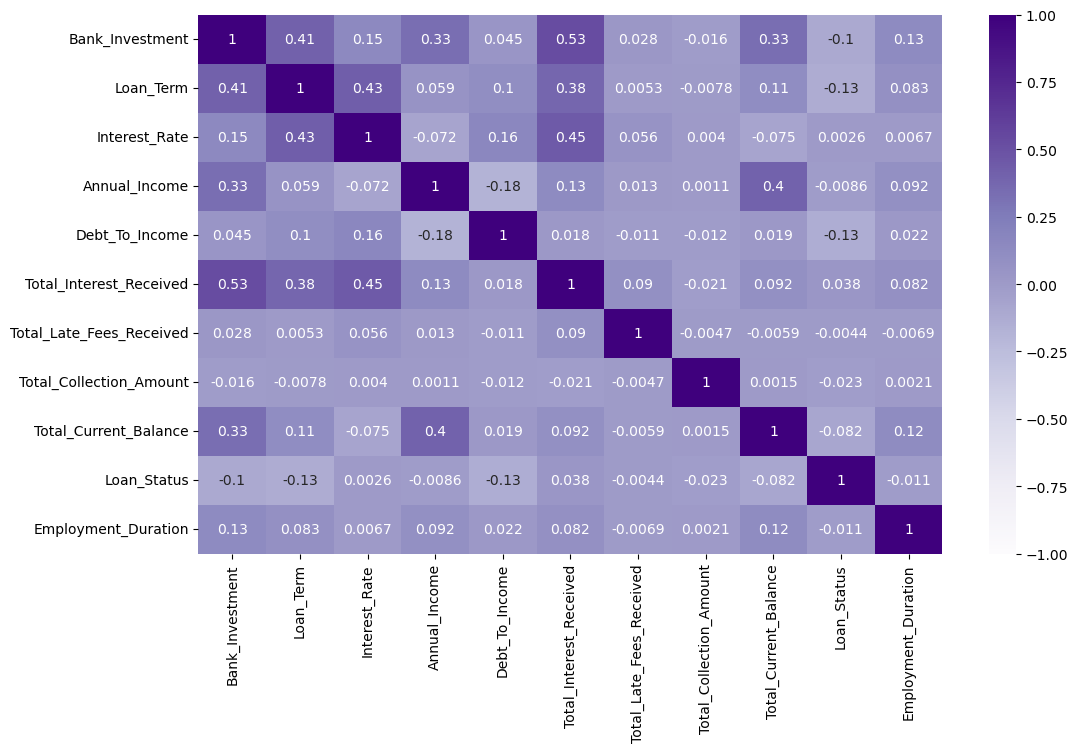

In [109]:
#Heat map (excluding non-numerical columns)
plt.figure(figsize=(12, 7))
sns.heatmap(df.corr(numeric_only=True), annot=True, vmin=-1, vmax=1, cmap="Purples")
plt.show()


### Observations
* Interest rate and term have a significant correlation.
* Bank investment and received interest total are also correlated.
* Total income and total current balance are correlated.

In [110]:
def find_outliers(df, col):
    Q1 = df[col].describe()['25%']
    Q3 = df[col].describe()['75%']
    IQR = Q3 - Q1
    lowerBound = Q1 - 1.5 * IQR
    upperBound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lowerBound) | (df[col] > upperBound)]
    return outliers

outliers = find_outliers(df, 'Annual_Income')
print(outliers)

outliers = find_outliers(df, 'Interest_Rate')
df.drop(outliers.index, inplace=True)


        Bank_Investment  Loan_Term  Interest_Rate  Annual_Income  \
27              19175.0         36           6.62       250000.0   
30              30000.0         60           9.99       180000.0   
31              35000.0         60          16.59       480000.0   
47              19725.0         36          13.67       168000.0   
52              20000.0         36          12.69       160000.0   
...                 ...        ...            ...            ...   
532306          28000.0         36           6.49       500000.0   
532320          29950.0         36          10.99       200000.0   
532330          35000.0         60          21.00       165000.0   
532336          28000.0         36           6.62       160000.0   
532369          25000.0         60          17.57       852000.0   

                 Status        Loan_Purpose State  Debt_To_Income  \
27      Source Verified  debt_consolidation    AL           25.86   
30      Source Verified         credit_card  